# **Домашняя работа 1 (21.04)**

In [ ]:
#установка библиотеки
!pip install psycopg2

In [ ]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd

DB_HOST = '52.157.159.24'

#####################
#!введите свои реквизиты!

DB_USER = 'student2'
DB_USER_PASSWORD = 'student2_password'
DB_NAME = 'sql_ex'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Рассматривается БД кораблей, участвовавших во второй мировой войне. Имеются следующие отношения:

*   Classes (class, type, country, numGuns, bore, displacement)
*   Ships (name, class, launched)
*   Battles (name, date)
*   Outcomes (ship, battle, result)

Корабли в «классах» построены по одному и тому же проекту, и классу присваивается либо имя первого корабля, построенного по данному проекту, либо названию класса дается имя проекта, которое не совпадает ни с одним из кораблей в БД. Корабль, давший название классу, называется головным.

*   Отношение ***Classes*** содержит имя класса, тип (bb для боевого (линейного) корабля или bc для боевого крейсера), страну, в которой построен корабль, число главных орудий, калибр орудий (диаметр ствола орудия в дюймах) и водоизмещение ( вес в тоннах). 
*   В отношении ***Ships*** записаны название корабля, имя его класса и год спуска на воду. 
*   В отношение ***Battles*** включены название и дата битвы, в которой участвовали корабли. 
*   В отношении **Outcomes** – результат участия данного корабля в битве (потоплен-sunk, поврежден - damaged или невредим - OK).

Замечания. 1) В отношение Outcomes могут входить корабли, отсутствующие в отношении Ships. 2) Потопленный корабль в последующих битвах участия не принимает.

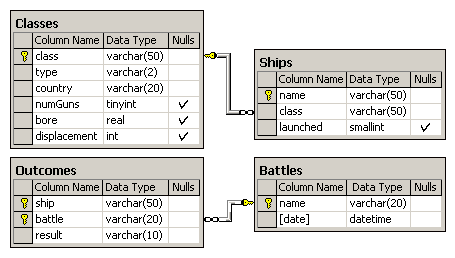

In [ ]:
#checking
request = """
SELECT * 
FROM ships
"""
pd.read_sql_query(request, conn)

name           class  launched
0        California       Tennessee      1921
1            Haruna           Kongo      1916
2              Hiei           Kongo      1914
3              Iowa            Iowa      1943
4         Kirishima           Kongo      1915
5             Kongo           Kongo      1913
6          Missouri            Iowa      1944
7           Musashi          Yamato      1942
8        New Jersey            Iowa      1943
9    North Carolina  North Carolina      1941
10        Ramillies         Revenge      1917
11           Renown          Renown      1916
12          Repulse          Renown      1916
13       Resolution          Renown      1916
14          Revenge         Revenge      1916
15        Royal Oak         Revenge      1916
16  Royal Sovereign         Revenge      1916
17        Tennessee       Tennessee      1920
18       Washington  North Carolina      1941
19        Wisconsin            Iowa      1944
20           Yamato          Yamato      1941
21     South Dakota  North Carolina      1941

In [ ]:
request = """
SELECT * 
FROM Outcomes
"""
pd.read_sql_query(request, conn)

ship          battle   result
0          Bismarck  North Atlantic     sunk
1        California  Surigao Strait       OK
2      Duke of York      North Cape       OK
3              Fuso  Surigao Strait     sunk
4              Hood  North Atlantic     sunk
5     King George V  North Atlantic       OK
6         Kirishima     Guadalcanal     sunk
7   Prince of Wales  North Atlantic  damaged
8            Rodney  North Atlantic       OK
9        Schamhorst      North Cape     sunk
10     South Dakota     Guadalcanal  damaged
11        Tennessee  Surigao Strait       OK
12       Washington     Guadalcanal       OK
13    West Virginia  Surigao Strait       OK
14        Yamashiro  Surigao Strait     sunk
15       California     Guadalcanal  damaged

In [ ]:
#checking
request = """
SELECT * 
FROM classes
"""
pd.read_sql_query(request, conn)

class type     country  numguns  bore  displacement
0        Bismarck   bb     Germany        8  15.0         42000
1            Iowa   bb         USA        9  16.0         46000
2           Kongo   bc       Japan        8  14.0         32000
3  North Carolina   bb         USA       12  16.0         37000
4          Renown   bc  Gt.Britain        6  15.0         32000
5         Revenge   bb  Gt.Britain        8  15.0         29000
6       Tennessee   bb         USA       12  14.0         32000
7          Yamato   bb       Japan        9  18.0         65000

Задание 1: Вывести name, class по кораблям, выпущенным после 1920 

In [ ]:
#task1
request = """
SELECT *
FROM ships 
where launched>1920
"""
pd.read_sql_query(request, conn)

name           class  launched
0      California       Tennessee      1921
1            Iowa            Iowa      1943
2        Missouri            Iowa      1944
3         Musashi          Yamato      1942
4      New Jersey            Iowa      1943
5  North Carolina  North Carolina      1941
6      Washington  North Carolina      1941
7       Wisconsin            Iowa      1944
8          Yamato          Yamato      1941
9    South Dakota  North Carolina      1941

Задание 2: Вывести name, class по кораблям, выпущенным после 1920, но не позднее 1942

In [ ]:
#task2
request = """
SELECT *
FROM ships 
where (launched>1920 and launched<1942) 
"""
pd.read_sql_query(request, conn)

name           class  launched
0      California       Tennessee      1921
1  North Carolina  North Carolina      1941
2      Washington  North Carolina      1941
3          Yamato          Yamato      1941
4    South Dakota  North Carolina      1941

Задание 3: Какое количество кораблей в каждом классе. Вывести количество и class

In [ ]:
#task3
request = """
select count(class),class
from ships
group by class

"""
pd.read_sql_query(request, conn)

count           class
0      2       Tennessee
1      4         Revenge
2      2          Yamato
3      4           Kongo
4      3          Renown
5      3  North Carolina
6      4            Iowa

Задание 4: Для классов кораблей, калибр орудий которых не менее 16, укажите класс и страну. (таблица classes)


In [ ]:
#task4
request = """

SELECT class, country
FROM classes 
where bore>=16 

"""
pd.read_sql_query(request, conn)

class country
0            Iowa     USA
1  North Carolina     USA
2          Yamato   Japan

In [ ]:
request = """
SELECT * 
FROM Battles
"""
pd.read_sql_query(request, conn)

name       date
0     Guadalcanal 1942-11-15
1  North Atlantic 1941-05-25
2      North Cape 1943-12-26
3  Surigao Strait 1944-10-25
4        #Cuba62a 1962-10-20
5        #Cuba62b 1962-10-25

Задание 5: Укажите корабли, потопленные в сражениях в Северной Атлантике (таблица Outcomes, North Atlantic). Вывод: ship.

In [ ]:
#task5
request = """
SELECT ship
FROM Outcomes
where battle='North Atlantic' and result='sunk' 
"""
pd.read_sql_query(request, conn)

ship
0  Bismarck
1      Hood

Задание 6: Вывести название (ship) последнего потопленного корабля

In [ ]:
#task6
request = """
select ship
from Outcomes o
join Battles b
on o.battle =b.name
where o.result='sunk'
ORDER BY b.date DESC LIMIT 1
"""
pd.read_sql_query(request, conn)

ship
0  Fuso

Задание 7: Вывести название корабля (ship) и класс (class) последнего потопленного корабля

In [ ]:
#task7
request = """
select ship, class
FROM Classes RIGHT JOIN
Outcomes o ON Classes.class = o.ship 
join Battles b
on o.battle =b.name
where o.result='sunk'
ORDER BY b.date DESC LIMIT 1
"""
pd.read_sql_query(request, conn)

ship class
0  Fuso  None

Задание 8: Вывести все потопленные корабли, у которых калибр орудий не менее 16, и которые потоплены. Вывод: ship, class


In [ ]:
#task8
request = """
select ship, class
FROM Classes RIGHT JOIN
Outcomes o ON Classes.class = o.ship 
join Battles b
on o.battle =b.name
where o.result='sunk' and Classes.bore<=16

"""
pd.read_sql_query(request, conn)

ship     class
0  Bismarck  Bismarck

Задание 9: Вывести все классы кораблей, выпущенные США (таблица classes, country = 'USA'). Вывод: class


In [ ]:
#task9
request = """
select class
FROM Classes 
where country = 'USA'
"""
pd.read_sql_query(request, conn)

class
0            Iowa
1  North Carolina
2       Tennessee

Задание 10: Вывести все корабли, выпущенные США (таблица classes & ships, country = 'USA'). Вывод: name, class

In [ ]:
#task10
request = """
select c.class, name
FROM Classes c 
join ships s 
on c.class = s.class
where country = 'USA'
"""
pd.read_sql_query(request, conn)

class            name
0       Tennessee      California
1            Iowa            Iowa
2            Iowa        Missouri
3            Iowa      New Jersey
4  North Carolina  North Carolina
5       Tennessee       Tennessee
6  North Carolina      Washington
7            Iowa       Wisconsin
8  North Carolina    South Dakota